In [1]:
import pandas as pd
import gzip
import json
import os
import re

## Read data from file

In [2]:
file_path = os.path.join(os.getcwd(), '..', 'Data','Clothing_Shoes_and_Jewelry_5.json')
chunks = []

for chunk in pd.read_json(file_path, lines=True, chunksize=100000):
    #chunk = chunk[selected_columns]  # Filter the DataFrame to keep only the selected columns
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)

In [3]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,2.0,True,"05 4, 2014",A2IC3NZN488KWK,0871167042,{'Format:': ' Paperback'},Ruby Tulip,"This book has beautiful photos, good and under...",Unique designs,1399161600,NaN
1,5,NaN,True,"03 31, 2014",A30FG02C424EJ5,0871167042,{'Format:': ' Paperback'},NWCancerBaby,Loved their approach in this book and that it ...,Great Book,1396224000,NaN
2,5,NaN,True,"05 30, 2015",A2G9GWQEWWNQUB,0871167042,{'Format:': ' Paperback'},Pamelarenee,great,Five Stars,1432944000,NaN
3,5,NaN,True,"02 21, 2015",A3NI5OGW35SLY2,0871167042,{'Format:': ' Paperback'},Gail,"Always love the way Eva thinks, and there are ...",Great Book!,1424476800,NaN
4,5,NaN,True,"01 21, 2015",A1OPRA4NE56EV6,0871167042,{'Format:': ' Paperback'},carol a inman,Nice patterns,Five Stars,1421798400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11285464 entries, 0 to 11285463
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   vote            object
 2   verified        bool  
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   style           object
 7   reviewerName    object
 8   reviewText      object
 9   summary         object
 10  unixReviewTime  int64 
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 957.9+ MB


## Duplicates removal

In [5]:
## Same user adding review for different products(asin) at the same time is not possible
df[df.duplicated(subset=['reviewerID', 'reviewerName', 'reviewTime', 'reviewText'], keep=False)].sort_values(by=['reviewerID', 'reviewerName', 'reviewTime', 'reviewText'])

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
3206666,5,NaN,True,"11 9, 2016",A001170867ZBE9FORRQL,B006PDD2SI,"{'Size:': ' Medium', 'Color:': ' White, Nights...",Amber,"Gift, he loves it.",Five Stars,1478649600,NaN
3314647,5,NaN,True,"11 9, 2016",A001170867ZBE9FORRQL,B0076RL90K,"{'Size:': ' Medium', 'Color:': ' Black'}",Amber,"Gift, he loves it.",Five Stars,1478649600,NaN
1630981,5,NaN,True,"12 15, 2016",A001170867ZBE9FORRQL,B001LRNGZC,"{'Size:': ' Large', 'Color:': ' Dark Navy'}",Amber,Good shirt.,Good shirt.,1481760000,NaN
1631512,5,NaN,True,"12 15, 2016",A001170867ZBE9FORRQL,B001LRR9IM,NaN,Amber,Good shirt.,Good shirt.,1481760000,NaN
4884748,1,NaN,True,"11 30, 2017",A00181966XZUX7KEGYLH,B00FC1W5IC,"{'Size:': ' 9 B(M) US', 'Color:': ' Dark Camel...",Amber Ashley,I didn't even put these on my feet because as ...,Dont waste your time or money,1512000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1234576,5,NaN,True,"04 25, 2014",AZZZMCJO078D2,B0013EOJQS,{'Color:': ' Fuchsia'},Wendy,This scarf is all it has been made out to be! ...,Warm & Beautiful,1398384000,NaN
531982,5,NaN,True,"08 3, 2016",AZZZV0D9D5V05,B000MXIMKK,"{'Size:': ' 32W x 29L', 'Color:': ' Black'}",Greg Golson,Just as described. Fit great.,Fit great.,1470182400,NaN
536737,5,NaN,True,"08 3, 2016",AZZZV0D9D5V05,B000MXQ2CU,"{'Size:': ' 32W x 29L', 'Color:': ' Black'}",Greg Golson,Just as described. Fit great.,Fit great.,1470182400,NaN
746473,5,NaN,True,"08 3, 2016",AZZZV0D9D5V05,B000WTOCS0,NaN,Greg Golson,Just as described. Fit great.,Fit great.,1470182400,NaN


In [6]:
#removing identified Duplicates
df = df.drop_duplicates(subset=['reviewerID', 'reviewerName', 'reviewTime', 'reviewText'], keep = 'first').reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271774 entries, 0 to 9271773
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   vote            object
 2   verified        bool  
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   style           object
 7   reviewerName    object
 8   reviewText      object
 9   summary         object
 10  unixReviewTime  int64 
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 787.0+ MB


#### 9271774 clean rows left after removal of duplicate rows from a total of 11285464 rows. 

## Feature Selection

In [8]:
selected_columns = ["overall", "summary", "reviewText"]
df = df[selected_columns]

In [9]:
df.head()

,overall,summary,reviewText
0,5,Unique designs,"This book has beautiful photos, good and under..."
1,5,Great Book,Loved their approach in this book and that it ...
2,5,Five Stars,great
3,5,Great Book!,"Always love the way Eva thinks, and there are ..."
4,5,Five Stars,Nice patterns


## Merging `summary` and `reviewText` into single column `reviewText`

In [10]:
df['reviewText']  = df['summary'].fillna('') + ' ' + df['reviewText'].fillna('')

In [11]:
df['reviewText'] = df['reviewText'].str.strip()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271774 entries, 0 to 9271773
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   summary     object
 2   reviewText  object
dtypes: int64(1), object(2)
memory usage: 212.2+ MB


In [13]:
df.head()

,overall,summary,reviewText
0,5,Unique designs,"Unique designs This book has beautiful photos,..."
1,5,Great Book,Great Book Loved their approach in this book a...
2,5,Five Stars,Five Stars great
3,5,Great Book!,"Great Book! Always love the way Eva thinks, an..."
4,5,Five Stars,Five Stars Nice patterns


In [14]:
df.drop(['summary'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271774 entries, 0 to 9271773
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   reviewText  object
dtypes: int64(1), object(1)
memory usage: 141.5+ MB


## Checking for NA

In [16]:
## replacing white spaces with NaN in review
df['reviewText'].replace(r'^\s*$', pd.NA, regex=True, inplace=True)

In [17]:
df.dropna(inplace=True)

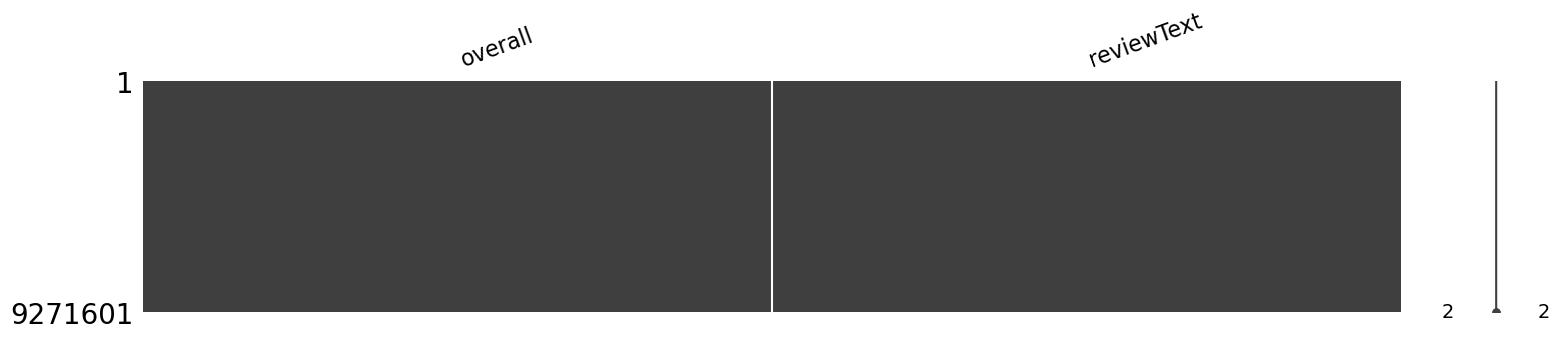

In [18]:
import missingno as msno # pip install missingno
msno.matrix(df, figsize=(18, 3), label_rotation=20);

In [19]:
df.isna().sum()

overall       0
reviewText    0
dtype: int64

## Renaming columns

In [20]:
df.rename(columns={'overall': 'rating', 'reviewText': 'review'}, inplace=True)

In [21]:
df.head()

,rating,review
0,5,"Unique designs This book has beautiful photos,..."
1,5,Great Book Loved their approach in this book a...
2,5,Five Stars great
3,5,"Great Book! Always love the way Eva thinks, an..."
4,5,Five Stars Nice patterns


## Updating rating (overall) column to 2 classes

In [22]:
pd.concat([df['rating'].value_counts(), df['rating'].value_counts(normalize=True)*100], axis=1, keys=['Rating', '% of Total rows'])

,Rating,% of Total rows
5,5658940,61.035198
4,1741927,18.787769
3,922680,9.951679
2,493178,5.319232
1,454876,4.906121


In [23]:
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x in [4, 5] else 'negative')

In [24]:
df['sentiment'].value_counts(normalize=True)

positive    0.79823
negative    0.20177
Name: sentiment, dtype: float64

In [25]:
df.drop(columns=['rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
df.head() 

,review,sentiment
0,"Unique designs This book has beautiful photos,...",positive
1,Great Book Loved their approach in this book a...,positive
2,Five Stars great,positive
3,"Great Book! Always love the way Eva thinks, an...",positive
4,Five Stars Nice patterns,positive


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271601 entries, 0 to 9271600
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   review     object
 1   sentiment  object
dtypes: object(2)
memory usage: 141.5+ MB


## Saving to file

In [28]:
file_path = os.path.join(os.getcwd(), '..', 'Data','1_Clean.csv')
df.to_csv(file_path, index=False)